# Loan Default Classification

### Loading necessary libraries

In [1]:
import os 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import time
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

### Dataset Loading

In [2]:
data = pd.read_csv("LoanData.csv")
data

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"35,000.00",14.27,10,Y,4,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32581,32577.0,57,53000,MORTGAGE,1.0,PERSONAL,C,"5,800.00",13.16,7,NaN,30,NO DEFAULT
32582,32578.0,54,120000,MORTGAGE,4.0,PERSONAL,A,"17,625.00",7.49,4,NaN,19,NO DEFAULT
32583,32579.0,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,"35,000.00",10.99,5,N,28,DEFAULT
32584,32580.0,56,150000,MORTGAGE,5.0,PERSONAL,B,"15,000.00",11.48,6,NaN,26,NO DEFAULT


### Data Preprocessing

In [3]:
# Filter the DataFrame for ages between 20 and 100
data = data[(data['customer_age'] >= 20) & (data['customer_age'] <= 100)]
data


,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"35,000.00",14.27,10,Y,4,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32581,32577.0,57,53000,MORTGAGE,1.0,PERSONAL,C,"5,800.00",13.16,7,NaN,30,NO DEFAULT
32582,32578.0,54,120000,MORTGAGE,4.0,PERSONAL,A,"17,625.00",7.49,4,NaN,19,NO DEFAULT
32583,32579.0,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,"35,000.00",10.99,5,N,28,DEFAULT
32584,32580.0,56,150000,MORTGAGE,5.0,PERSONAL,B,"15,000.00",11.48,6,NaN,26,NO DEFAULT


In [4]:
data.shape

(32578, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32578 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32575 non-null  float64
 1   customer_age         32578 non-null  int64  
 2   customer_income      32578 non-null  object 
 3   home_ownership       32578 non-null  object 
 4   employment_duration  31683 non-null  float64
 5   loan_intent          32578 non-null  object 
 6   loan_grade           32578 non-null  object 
 7   loan_amnt            32577 non-null  object 
 8   loan_int_rate        29463 non-null  float64
 9   term_years           32578 non-null  int64  
 10  historical_default   11845 non-null  object 
 11  cred_hist_length     32578 non-null  int64  
 12  Current_loan_status  32574 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.5+ MB


In [6]:
data.dtypes

customer_id            float64
customer_age             int64
customer_income         object
home_ownership          object
employment_duration    float64
loan_intent             object
loan_grade              object
loan_amnt               object
loan_int_rate          float64
term_years               int64
historical_default      object
cred_hist_length         int64
Current_loan_status     object
dtype: object

### Handling Missing Data 

In [7]:
#checking for null values 
data.isnull().sum()

customer_id                3
customer_age               0
customer_income            0
home_ownership             0
employment_duration      895
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate           3115
term_years                 0
historical_default     20733
cred_hist_length           0
Current_loan_status        4
dtype: int64

In [8]:
data.dropna()
data.isnull().sum()

customer_id                3
customer_age               0
customer_income            0
home_ownership             0
employment_duration      895
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate           3115
term_years                 0
historical_default     20733
cred_hist_length           0
Current_loan_status        4
dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Calculate the median of 'employment_duration'
median_value = data['employment_duration'].median()

# Fill missing values in 'employment_duration' with the median
data['employment_duration'].fillna(median_value, inplace=True)

In [11]:
# Calculate the median of 'employment_duration'
median_value = data['loan_int_rate'].median()

# Fill missing values in 'employment_duration' with the median
data['loan_int_rate'].fillna(median_value, inplace=True)

In [12]:
data = data.dropna(subset=['Current_loan_status','customer_id', 'loan_amnt'])
data.isnull().sum()

customer_id                0
customer_age               0
customer_income            0
home_ownership             0
employment_duration        0
loan_intent                0
loan_grade                 0
loan_amnt                  0
loan_int_rate              0
term_years                 0
historical_default     20731
cred_hist_length           0
Current_loan_status        0
dtype: int64

In [13]:
# Proportions of 'Y' and 'N'
proportions = {'Y': 0.517174, 'N': 0.482826}

# Randomly impute missing values based on the proportions
data['historical_default'] = data['historical_default'].apply(
    lambda x: np.random.choice(['Y', 'N'], p=[proportions['Y'], proportions['N']]) if pd.isnull(x) else x
)

data.isnull().sum()

customer_id            0
customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
term_years             0
historical_default     0
cred_hist_length       0
Current_loan_status    0
dtype: int64

In [14]:
data.dtypes

customer_id            float64
customer_age             int64
customer_income         object
home_ownership          object
employment_duration    float64
loan_intent             object
loan_grade              object
loan_amnt               object
loan_int_rate          float64
term_years               int64
historical_default      object
cred_hist_length         int64
Current_loan_status     object
dtype: object

### Data types handling 

In [15]:
# Remove commas or any other unwanted characters
data['customer_income'] = data['customer_income'].replace({',': ''}, regex=True)

# Convert the cleaned customer_income to numeric
data['customer_income'] = pd.to_numeric(data['customer_income'], errors='coerce')

# Check the result
print(data['customer_income'].dtype)  
print(data['customer_income'].head())  

int64
0    59000
1     9600
2     9600
3    65500
4    54400
Name: customer_income, dtype: int64


In [16]:
print(data['loan_amnt'].head(10))

0    35,000.00
1     1,000.00
2     5,500.00
3    35,000.00
4    35,000.00
5     2,500.00
6    35,000.00
7    35,000.00
8    35,000.00
9     1,600.00
Name: loan_amnt, dtype: object


In [17]:
# Remove commas from the loan_amnt column
data['loan_amnt'] = data['loan_amnt'].str.replace(',', '', regex=False)

# Display the updated column
print(data['loan_amnt'].head())


0    35000.00
1     1000.00
2     5500.00
3    35000.00
4    35000.00
Name: loan_amnt, dtype: object


In [18]:
data['loan_amnt'] = pd.to_numeric(data['loan_amnt'], errors='coerce')
print(data['loan_amnt'].head())


0    35000.0
1     1000.0
2     5500.0
3    35000.0
4    35000.0
Name: loan_amnt, dtype: float64


In [19]:
data

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,35000.0,16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,1000.0,11.14,1,N,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,35000.0,15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,35000.0,14.27,10,Y,4,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32581,32577.0,57,53000,MORTGAGE,1.0,PERSONAL,C,5800.0,13.16,7,N,30,NO DEFAULT
32582,32578.0,54,120000,MORTGAGE,4.0,PERSONAL,A,17625.0,7.49,4,Y,19,NO DEFAULT
32583,32579.0,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000.0,10.99,5,N,28,DEFAULT
32584,32580.0,56,150000,MORTGAGE,5.0,PERSONAL,B,15000.0,11.48,6,Y,26,NO DEFAULT


In [20]:
data.dtypes

customer_id            float64
customer_age             int64
customer_income          int64
home_ownership          object
employment_duration    float64
loan_intent             object
loan_grade              object
loan_amnt              float64
loan_int_rate          float64
term_years               int64
historical_default      object
cred_hist_length         int64
Current_loan_status     object
dtype: object

### Removing Outliers

In [21]:
# Calculate the IQR for each numerical feature
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outlier_condition = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# Print outliers
outliers = data[outlier_condition.any(axis=1)]
len(outliers)

5129

In [22]:
import pandas as pd

# function to remove outliers
def remove_outliers_iqr(df):
    df_cleaned = df.copy()
    
    for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1  
        
        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the DataFrame
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    
    return df_cleaned

# Remove outliers from the dataset
data_cleaned = remove_outliers_iqr(data)



In [23]:
# Calculate the IQR for each numerical feature
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outlier_condition = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# Print outliers
outliers = data_cleaned[outlier_condition.any(axis=1)]
len(outliers)

18

In [24]:
# Count outliers in each numerical column before removal
outlier_counts_before = {}
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_counts_before[col] = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()

print("Outliers before removal:")
print(outlier_counts_before)

# Count outliers in each numerical column after removal
outlier_counts_after = {}
for col in data_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_counts_after[col] = ((data_cleaned[col] < lower_bound) | (data_cleaned[col] > upper_bound)).sum()

print("Outliers after removal:")
print(outlier_counts_after)


Outliers before removal:
{'customer_id': 0, 'customer_age': 1490, 'customer_income': 1481, 'employment_duration': 854, 'loan_amnt': 1689, 'loan_int_rate': 70, 'term_years': 0, 'cred_hist_length': 1140}
Outliers after removal:
{'customer_id': 0, 'customer_age': 663, 'customer_income': 334, 'employment_duration': 541, 'loan_amnt': 0, 'loan_int_rate': 0, 'term_years': 0, 'cred_hist_length': 0}


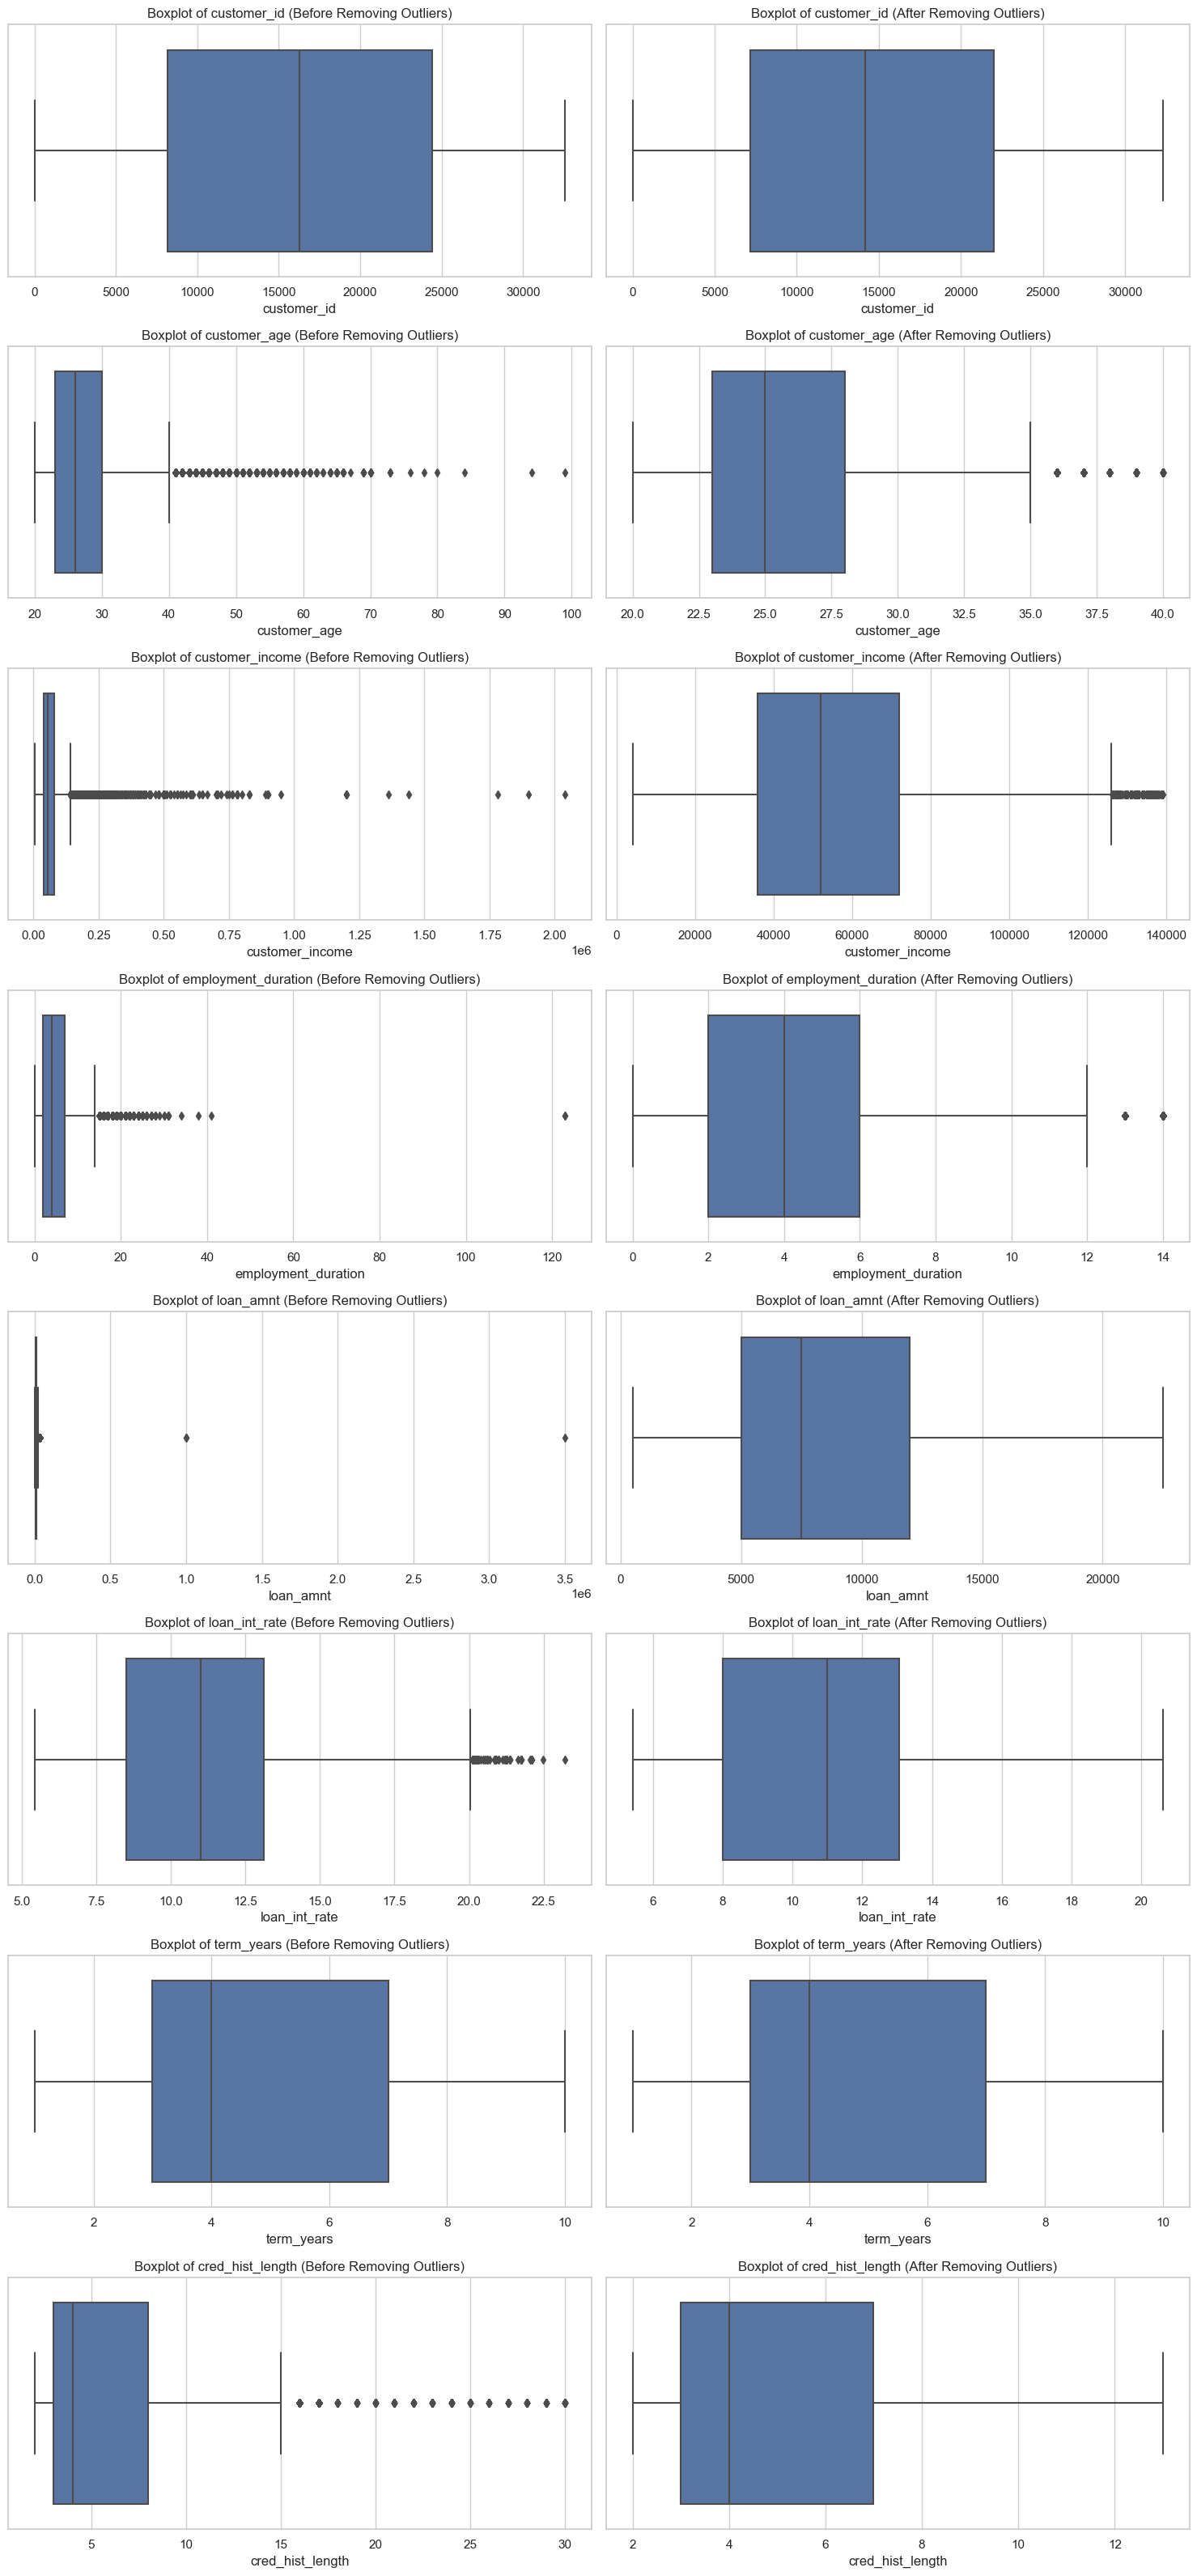

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Select numerical features
num_features = data.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(num_features)

# Create a figure with subplots
plt.figure(figsize=(15, num_plots * 4))

# Boxplots before removing outliers
for i, feature in enumerate(num_features, 1):
    plt.subplot(num_plots, 2, i*2-1)  
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature} (Before Removing Outliers)')

# Boxplots after removing outliers
for i, feature in enumerate(num_features, 1):
    plt.subplot(num_plots, 2, i*2)  
    sns.boxplot(x=data_cleaned[feature])
    plt.title(f'Boxplot of {feature} (After Removing Outliers)')

# Adjust layout
plt.tight_layout()
plt.show()


### Handling Skewness

In [26]:
import pandas as pd

# Select only numerical columns to calculate skewness
numerical_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Calculate skewness for each numerical feature
skewness = data_cleaned[numerical_columns].skew()

# Display skewness values
print("Skewness of each numerical feature:")
print(skewness)

Skewness of each numerical feature:
customer_id            0.097659
customer_age           0.977010
customer_income        0.752360
employment_duration    0.690741
loan_amnt              0.693117
loan_int_rate          0.164476
term_years             0.303437
cred_hist_length       0.928019
dtype: float64


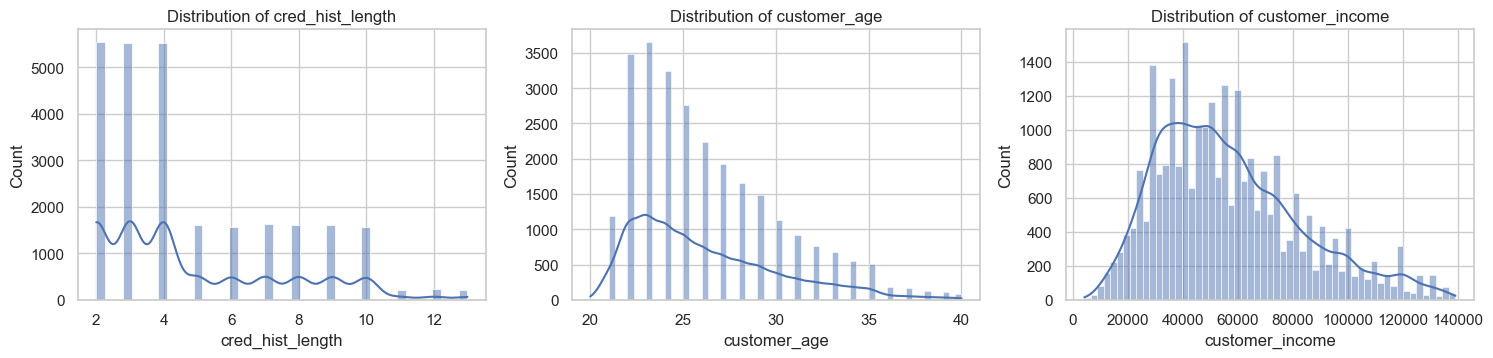

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
skewed_features = ['cred_hist_length', 'customer_age', 'customer_income']

# Plot the distribution of each numerical feature
plt.figure(figsize=(15, 10))  

for i, feature in enumerate(skewed_features, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(data_cleaned[feature], kde=True)  
    plt.title(f'Distribution of {feature}')

plt.tight_layout()  
plt.show()


### Log Transformation

In [28]:
# Log transformation for skewed features 
skewed_features = ['cred_hist_length', 'customer_age', 'customer_income']
for feature in skewed_features:
    data_cleaned[feature] = np.log1p(data_cleaned[feature])


In [29]:
# Calculate skewness for each numerical feature
skewness = data_cleaned[numerical_columns].skew()

# Display skewness values
print("Skewness of each numerical feature:")
print(skewness)

Skewness of each numerical feature:
customer_id            0.097659
customer_age           0.695306
customer_income       -0.442289
employment_duration    0.690741
loan_amnt              0.693117
loan_int_rate          0.164476
term_years             0.303437
cred_hist_length       0.359713
dtype: float64


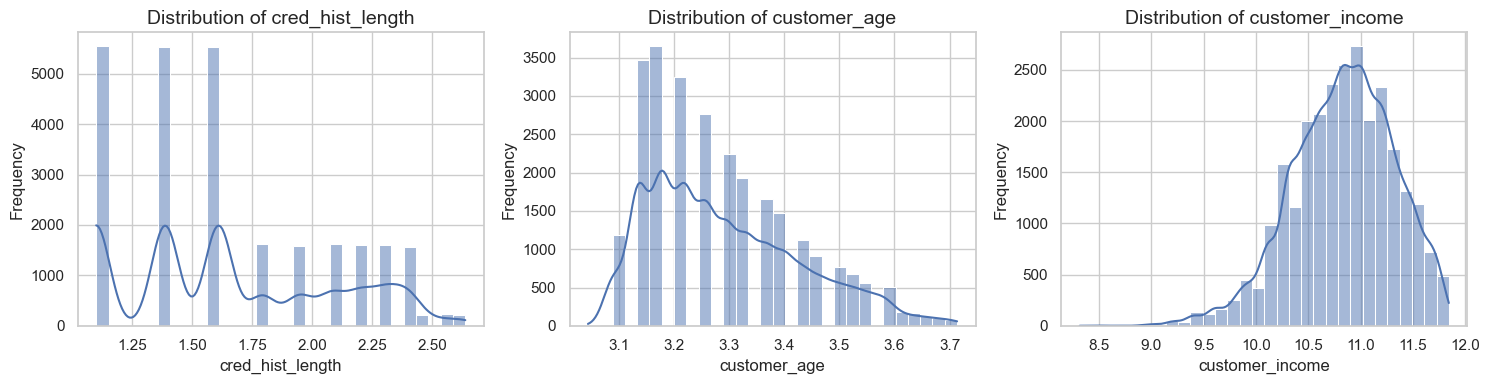

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

# Select only the numerical columns
skewed_features = ['cred_hist_length', 'customer_age', 'customer_income']

# Set the number of subplots
num_cols = 3  
num_rows = (len(skewed_features) + num_cols - 1) // num_cols  

# Create subplots
plt.figure(figsize=(15, num_rows * 4))

# Loop through each numerical column and plot its distribution
for i, col in enumerate(skewed_features):
    plt.subplot(num_rows, num_cols, i + 1)  
    sns.histplot(data_cleaned[col], bins=30, kde=True)  
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


### Synthetic Variables 

In [31]:
# Create Debt-to-Income ratio
data_cleaned['debt_to_income'] = data_cleaned['loan_amnt'] / data_cleaned['customer_income']

In [32]:
data_cleaned['loan_payment_burden'] = data_cleaned['loan_amnt'] / data_cleaned['term_years']

In [33]:
# Create a binary variable for short-term (<5 years) vs. long-term loans
data_cleaned['short_term_loan'] = data_cleaned['term_years'].apply(lambda x: 1 if x < 5 else 0)

In [34]:
data_cleaned

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,debt_to_income,loan_payment_burden,short_term_loan
1,2.0,3.091042,9.169623,OWN,5.0,EDUCATION,A,1000.0,11.14,1,N,1.098612,NO DEFAULT,109.055743,1000.000000,1
2,3.0,3.258097,9.169623,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,N,1.386294,DEFAULT,599.806587,1100.000000,0
5,6.0,3.091042,9.200391,OWN,2.0,VENTURE,A,2500.0,7.14,1,N,1.098612,DEFAULT,271.727581,2500.000000,1
9,10.0,3.091042,9.210440,OWN,6.0,VENTURE,C,1600.0,14.74,1,N,1.386294,DEFAULT,173.715907,1600.000000,1
11,12.0,3.091042,9.210440,OWN,2.0,HOMEIMPROVEMENT,A,4500.0,8.63,1,N,1.098612,DEFAULT,488.575988,4500.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32261,32257.0,3.663562,10.993328,MORTGAGE,10.0,MEDICAL,D,18125.0,14.84,8,Y,2.639057,DEFAULT,1648.727278,2265.625000,0
32263,32259.0,3.663562,11.125364,MORTGAGE,6.0,MEDICAL,B,5000.0,10.99,8,N,2.639057,NO DEFAULT,449.423493,625.000000,0
32274,32270.0,3.637586,9.980495,RENT,4.0,MEDICAL,D,3800.0,10.99,7,N,2.484907,DEFAULT,380.742643,542.857143,0
32290,32286.0,3.663562,9.392745,OWN,4.0,EDUCATION,A,4800.0,7.29,8,N,2.564949,NO DEFAULT,511.032703,600.000000,0


### Checking Class Imbalance

In [35]:
# distribution of the target variable 
target_counts = data_cleaned['Current_loan_status'].value_counts()
print(target_counts)

# percentage distribution
target_percentage = data_cleaned['Current_loan_status'].value_counts(normalize=True) * 100
print(target_percentage)

NO DEFAULT    21182
DEFAULT        5668
Name: Current_loan_status, dtype: int64
NO DEFAULT    78.89013
DEFAULT       21.10987
Name: Current_loan_status, dtype: float64


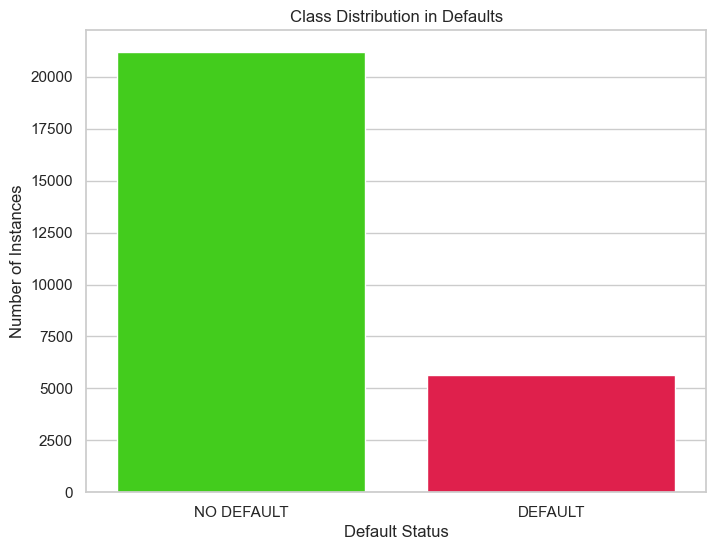

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='prism')

# Add labels and title
plt.xlabel('Default Status')
plt.ylabel('Number of Instances')
plt.title('Class Distribution in Defaults')
plt.show()


In [38]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd


# Instantiate OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['NO DEFAULT', 'DEFAULT']])

# Fit-transform and overwrite the original column
data_cleaned['Current_loan_status'] = ordinal_encoder.fit_transform(data_cleaned[['Current_loan_status']]).astype(int)
data_cleaned


       customer_id  customer_age  customer_income home_ownership  \
1              2.0      3.091042         9.169623            OWN   
2              3.0      3.258097         9.169623       MORTGAGE   
5              6.0      3.091042         9.200391            OWN   
9             10.0      3.091042         9.210440            OWN   
11            12.0      3.091042         9.210440            OWN   
...            ...           ...              ...            ...   
32261      32257.0      3.663562        10.993328       MORTGAGE   
32263      32259.0      3.663562        11.125364       MORTGAGE   
32274      32270.0      3.637586         9.980495           RENT   
32290      32286.0      3.663562         9.392745            OWN   
32298      32294.0      3.663562        11.608245       MORTGAGE   

       employment_duration      loan_intent loan_grade  loan_amnt  \
1                      5.0        EDUCATION          A     1000.0   
2                      1.0          MEDICAL  

# Feature Engineering

### Checking Correlations

In [39]:
# Compute correlation matrix
correlation_matrix = data_cleaned.corr()
correlated_features = correlation_matrix['Current_loan_status'].abs().sort_values(ascending=False)

print(correlated_features)

Current_loan_status    1.000000
loan_int_rate          0.312704
customer_income        0.307433
debt_to_income         0.110862
employment_duration    0.091446
loan_amnt              0.083856
customer_id            0.057366
loan_payment_burden    0.045125
customer_age           0.025723
term_years             0.023148
cred_hist_length       0.017293
short_term_loan        0.012252
Name: Current_loan_status, dtype: float64


### Drop low correlated features 

In [40]:
correlation_threshold = 0.09

# correlation matrix
correlation_matrix = data_cleaned.corr()

# Identify features with absolute correlation less than the threshold
low_correlation_features = correlation_matrix.columns[abs(correlation_matrix['Current_loan_status']) < correlation_threshold]

# Drop these features from the dataset
data_cleaned = data_cleaned.drop(columns=low_correlation_features)

data_cleaned

,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_int_rate,historical_default,Current_loan_status,debt_to_income
1,9.169623,OWN,5.0,EDUCATION,A,11.14,N,0,109.055743
2,9.169623,MORTGAGE,1.0,MEDICAL,B,12.87,N,1,599.806587
5,9.200391,OWN,2.0,VENTURE,A,7.14,N,1,271.727581
9,9.210440,OWN,6.0,VENTURE,C,14.74,N,1,173.715907
11,9.210440,OWN,2.0,HOMEIMPROVEMENT,A,8.63,N,1,488.575988
...,...,...,...,...,...,...,...,...,...
32261,10.993328,MORTGAGE,10.0,MEDICAL,D,14.84,Y,1,1648.727278
32263,11.125364,MORTGAGE,6.0,MEDICAL,B,10.99,N,0,449.423493
32274,9.980495,RENT,4.0,MEDICAL,D,10.99,N,1,380.742643
32290,9.392745,OWN,4.0,EDUCATION,A,7.29,N,0,511.032703


### Encoding 

In [41]:
# Convert categorical columns to numeric using one-hot encoding
data_cleaned = pd.get_dummies(data_cleaned, columns=['home_ownership','loan_intent', 'historical_default'], drop_first=True)
data_cleaned.dtypes

customer_income                float64
employment_duration            float64
loan_grade                      object
loan_int_rate                  float64
Current_loan_status              int32
debt_to_income                 float64
home_ownership_OTHER             uint8
home_ownership_OWN               uint8
home_ownership_RENT              uint8
loan_intent_EDUCATION            uint8
loan_intent_HOMEIMPROVEMENT      uint8
loan_intent_MEDICAL              uint8
loan_intent_PERSONAL             uint8
loan_intent_VENTURE              uint8
historical_default_Y             uint8
dtype: object

In [42]:
# Map the loan_grade column directly to 1, 2, 3, 4, 5
grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}

# Apply the mapping directly to the loan_grade column
data_cleaned['loan_grade'] = data_cleaned['loan_grade'].map(grade_mapping)

print(data_cleaned['loan_grade'].head())


1     1
2     2
5     1
9     3
11    1
Name: loan_grade, dtype: int64


In [43]:
data_cleaned.dtypes

customer_income                float64
employment_duration            float64
loan_grade                       int64
loan_int_rate                  float64
Current_loan_status              int32
debt_to_income                 float64
home_ownership_OTHER             uint8
home_ownership_OWN               uint8
home_ownership_RENT              uint8
loan_intent_EDUCATION            uint8
loan_intent_HOMEIMPROVEMENT      uint8
loan_intent_MEDICAL              uint8
loan_intent_PERSONAL             uint8
loan_intent_VENTURE              uint8
historical_default_Y             uint8
dtype: object

## Master Table 

In [44]:
master_table = data_cleaned.copy()

master_table.to_csv("Master_Loan_Data.csv", index=False)

# Print a summary of the master table
print("Master Table Shape:", master_table.shape)
master_table.head()


Master Table Shape: (26850, 15)


,customer_income,employment_duration,loan_grade,loan_int_rate,Current_loan_status,debt_to_income,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,historical_default_Y
1,9.169623,5.0,1,11.14,0,109.055743,0,1,0,1,0,0,0,0,0
2,9.169623,1.0,2,12.87,1,599.806587,0,0,0,0,0,1,0,0,0
5,9.200391,2.0,1,7.14,1,271.727581,0,1,0,0,0,0,0,1,0
9,9.210440,6.0,3,14.74,1,173.715907,0,1,0,0,0,0,0,1,0
11,9.210440,2.0,1,8.63,1,488.575988,0,1,0,0,1,0,0,0,0


### Data Splitting 

In [45]:
# Define your target variable and features
X = master_table.drop(columns=['Current_loan_status'])  
y = master_table['Current_loan_status']  


# XGBoost

### Finding best split set  

In [46]:
from sklearn.metrics import accuracy_score
import numpy as np
from xgboost import XGBClassifier

# Example of different proportions to test
proportions = [(0.7, 0.15, 0.15), (0.75, 0.1, 0.15), (0.8, 0.1, 0.1), (0.65, 0.2, 0.15)]
results = []

for train_size, val_size, test_size in proportions:
    # Split data into train+val and test set
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # Calculate the validation size based on the remaining data
    remaining = 1 - test_size
    val_size_adjusted = val_size / remaining  

    # Split the train+val set into training and validation
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size=train_size, random_state=42, stratify=y_train_val)
    
    # Initialize and train the model
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)

    # Validate the model
    y_val_pred = xgb_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)

    # Store results
    results.append((train_size, val_size, test_size, accuracy))

# Print results
for result in results:
    print(f"Train: {result[0]}, Val: {result[1]}, Test: {result[2]} - Validation Accuracy: {result[3]}")


Train: 0.7, Val: 0.15, Test: 0.15 - Validation Accuracy: 0.9123703811888418
Train: 0.75, Val: 0.1, Test: 0.15 - Validation Accuracy: 0.916403785488959
Train: 0.8, Val: 0.1, Test: 0.1 - Validation Accuracy: 0.915166563211256
Train: 0.65, Val: 0.2, Test: 0.15 - Validation Accuracy: 0.9124937406109164


#### Best Set - Train: 0.75, Val: 0.1, Test: 0.15 - Validation Accuracy: 0.9158780231335436


### XGBM before resampling

In [47]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import joblib

# Split data into 75% train, 10% validation, and 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)  
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42, stratify=y_temp)  

# Initialize XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = xgb_model.predict(X_train)

# Validate the model on the validation set
y_val_pred = xgb_model.predict(X_val)

# Evaluate the model performance on the training set
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

# Evaluate the model performance on the validation set
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')
val_conf_matrix = confusion_matrix(y_val, y_val_pred)

# Evaluate the model performance on the test set
y_test_pred = xgb_model.predict(X_test)

test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print training results
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1-Score:", train_f1)
print("Training Confusion Matrix:\n", train_conf_matrix)

# Print validation results
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1-Score:", val_f1)
print("Validation Confusion Matrix:\n", val_conf_matrix)

# Print test results
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1)
print("Test Confusion Matrix:\n", test_conf_matrix)


Training Precision: 0.9573334217337357
Training Recall: 0.9569449272483488
Training F1-Score: 0.9556429348485384
Training Confusion Matrix:
 [[15767   119]
 [  748  3503]]
Validation Precision: 0.9220187863404257
Validation Recall: 0.9234207389749702
Validation F1-Score: 0.9202848694443573
Validation Confusion Matrix:
 [[2588   60]
 [ 197  511]]
Test Precision: 0.9159609933740069
Test Recall: 0.9180816204944892
Test F1-Score: 0.9151209763829348
Test Confusion Matrix:
 [[2572   76]
 [ 199  510]]


### XGBoost after resampling

In [48]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE  

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42, stratify=y_temp)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dval = xgb.DMatrix(X_val, label=y_val)

# Train the model with default parameters
num_round = 10
bst = xgb.train({}, dtrain, num_round, evals=[(dtrain, 'train'), (dval, 'validation')], early_stopping_rounds=10)

# Make predictions on the validation set
y_val_pred_probs = bst.predict(dval)
y_val_pred = (y_val_pred_probs >= 0.5).astype(int)  

# Generate classification report for validation set
print("\nClassification Report for Validation Set:")
print(classification_report(y_val, y_val_pred))

# (Optional) Make predictions on the test set
dtest = xgb.DMatrix(X_test)
y_test_pred_probs = bst.predict(dtest)
y_test_pred = (y_test_pred_probs >= 0.5).astype(int)  

# Generate classification report for test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Function to evaluate precision, recall, and F1 score
def evaluate_metrics(y_true, y_pred, set_name):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{set_name} Set Performance:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Calculate and print metrics for training, validation, and test sets
y_train_pred = (bst.predict(xgb.DMatrix(X_train_resampled)) >= 0.5).astype(int)
evaluate_metrics(y_train_resampled, y_train_pred, "Training")
evaluate_metrics(y_val, y_val_pred, "Validation")
evaluate_metrics(y_test, y_test_pred, "Test")


[0]	train-rmse:0.42382	validation-rmse:0.43224
[1]	train-rmse:0.37286	validation-rmse:0.39066
[2]	train-rmse:0.34221	validation-rmse:0.36525
[3]	train-rmse:0.32076	validation-rmse:0.34986
[4]	train-rmse:0.30612	validation-rmse:0.33640
[5]	train-rmse:0.29446	validation-rmse:0.32663
[6]	train-rmse:0.28807	validation-rmse:0.32388
[7]	train-rmse:0.28234	validation-rmse:0.31878
[8]	train-rmse:0.27721	validation-rmse:0.31593
[9]	train-rmse:0.27486	validation-rmse:0.31461

Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      2648
           1       0.68      0.76      0.72       708

    accuracy                           0.87      3356
   macro avg       0.81      0.83      0.82      3356
weighted avg       0.88      0.87      0.88      3356


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2648
           1  

### Hyperparameter Tuning - Manually before resampling

In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

best_params = {
    'max_depth': 6,  
    'learning_rate': 0.01, 
    'n_estimators': 250,  
    'subsample': 0.9,  
    'colsample_bytree': 0.8,  
    'gamma': 0.2,  
    'reg_alpha': 6,  
    'reg_lambda': 8  
}

# Initialize the best XGBClassifier with the best parameters
best_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **best_params)

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the training, validation, and test sets
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

# Evaluate the model performance
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print precision, recall, and F1 scores
print("Training Precision Score: ", train_precision)
print("Training Recall Score: ", train_recall)
print("Training F1 Score: ", train_f1)

print("Validation Precision Score: ", val_precision)
print("Validation Recall Score: ", val_recall)
print("Validation F1 Score: ", val_f1)

print("Test Precision Score: ", test_precision)
print("Test Recall Score: ", test_recall)
print("Test F1 Score: ", test_f1)

# (Optional) Print classification reports for detailed metrics
print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report for Validation Set:")
print(classification_report(y_val, y_val_pred))

print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))


Training Precision Score:  0.9064318833696262
Training Recall Score:  0.9061925808213736
Training F1 Score:  0.899154012881408
Validation Precision Score:  0.9003833831485288
Validation Recall Score:  0.9013706793802145
Validation F1 Score:  0.8941452013248078
Test Precision Score:  0.8999038647865728
Test Recall Score:  0.9011021745606196
Test F1 Score:  0.8939936250916598

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     15886
           1       0.91      0.62      0.74      4251

    accuracy                           0.91     20137
   macro avg       0.91      0.80      0.84     20137
weighted avg       0.91      0.91      0.90     20137


Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2648
           1       0.89      0.61      0.72       708

    accuracy                           0.90     

### Hyperparameter tuning manually after resampling

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42, stratify=y_temp)

# Apply SMOTE to balance the training data
smote = SMOTE(sampling_strategy='minority', k_neighbors=15)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and fit the XGBoost model
best_params = {
    'max_depth': 5,  
    'learning_rate': 0.01, 
    'n_estimators': 150,  
    'subsample': 0.5,  
    'colsample_bytree': 0.8,  
    'gamma': 0.2,  
    'reg_alpha': 6,  
    'reg_lambda': 8  
}

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **best_params)
model.fit(X_train_resampled, y_train_resampled)

# Predict on the training set
y_train_pred = model.predict(X_train_resampled)

# Predict on the validation set
y_val_pred = model.predict(X_val)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate precision for the training set
train_precision = precision_score(y_train_resampled, y_train_pred, average='weighted')

# Calculate precision for the validation set
val_precision = precision_score(y_val, y_val_pred, average='weighted')

# Calculate precision for the test set
test_precision = precision_score(y_test, y_test_pred, average='weighted')

# Calculate recall for the training set
train_recall = recall_score(y_train_resampled, y_train_pred, average='weighted')

# Calculate recall for the validation set
val_recall = recall_score(y_val, y_val_pred, average='weighted')

# Calculate recall for the test set
test_recall = recall_score(y_test, y_test_pred, average='weighted')

# Calculate F1 score for the training set
train_f1 = f1_score(y_train_resampled, y_train_pred, average='weighted')

# Calculate F1 score for the validation set
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

# Calculate F1 score for the test set
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the results
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)

print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1 Score:", val_f1)

print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)

# Print the classification report for the validation set
print("\nClassification Report on Validation Set:\n", classification_report(y_val, y_val_pred))


Training Precision: 0.8690486912796654
Training Recall: 0.8685635150446934
Training F1 Score: 0.8685203020308396
Validation Precision: 0.8579757232542663
Validation Recall: 0.8304529201430274
Validation F1 Score: 0.8391013497037586
Test Precision: 0.8670509980476624
Test Recall: 0.8358653559725946
Test F1 Score: 0.8449774204108403

Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.93      0.84      0.89      2648
           1       0.57      0.78      0.66       708

    accuracy                           0.83      3356
   macro avg       0.75      0.81      0.77      3356
weighted avg       0.86      0.83      0.84      3356



### Feature Importance  

Top Features by Importance:
                         Feature  Importance
13         historical_default_Y    0.562980
3                 loan_int_rate    0.074629
0               customer_income    0.058672
2                    loan_grade    0.051920
10          loan_intent_MEDICAL    0.041867
6            home_ownership_OWN    0.039151
12          loan_intent_VENTURE    0.038046
8         loan_intent_EDUCATION    0.037609
11         loan_intent_PERSONAL    0.032967
4                debt_to_income    0.022195
7           home_ownership_RENT    0.015976
9   loan_intent_HOMEIMPROVEMENT    0.015498
1           employment_duration    0.007957
5          home_ownership_OTHER    0.000533


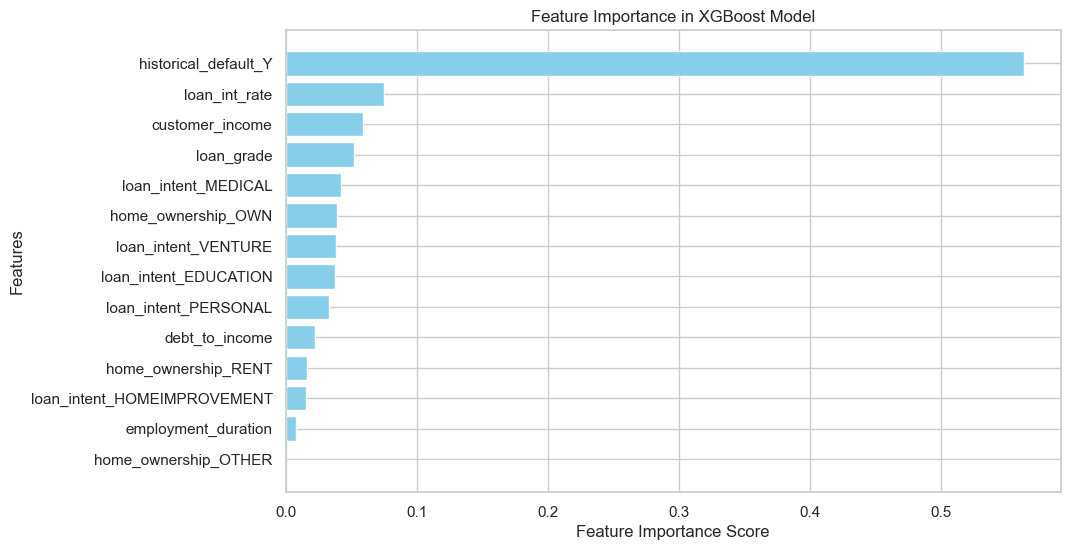

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_

feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])]

# Create a DataFrame to hold feature names and their importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Top Features by Importance:\n", importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in XGBoost Model")
plt.show()


### Confusion matrix

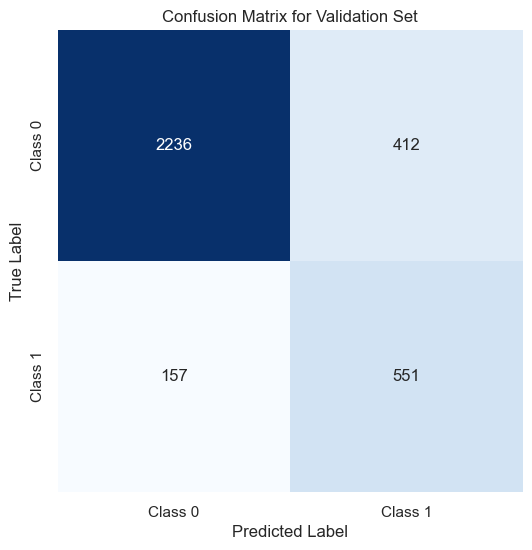

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# confusion matrix for the validation set
conf_matrix = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Validation Set')
plt.show()


### ROC Curve 

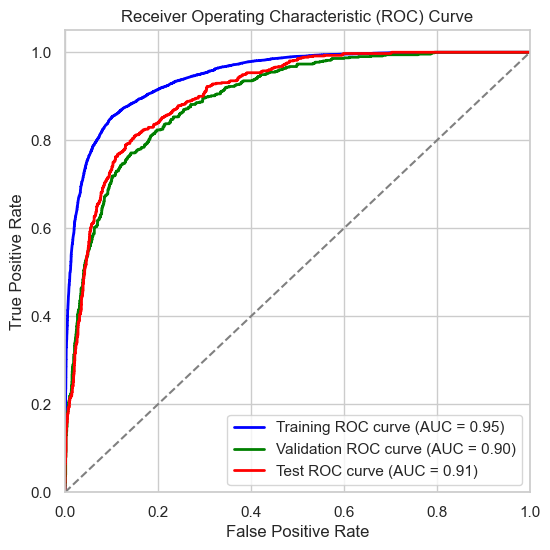

In [53]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probability predictions for each set
y_train_proba = model.predict_proba(X_train_resampled)[:, 1]
y_val_proba = model.predict_proba(X_val)[:, 1]
y_test_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for training set
fpr_train, tpr_train, _ = roc_curve(y_train_resampled, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute ROC curve and AUC for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
roc_auc_val = auc(fpr_val, tpr_val)

# Compute ROC curve and AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot the ROC curves
plt.figure(figsize=(6, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_val, tpr_val, color='green', lw=2, label=f'Validation ROC curve (AUC = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### XGBoost + hpt using GridSearch before resampling

In [54]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42, stratify=y_temp)

# Create the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define parameter grid for GridSearch
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Setup Grid Search
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='f1',  
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Output best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Train final model with best parameters
best_model = grid_search.best_estimator_

# Make predictions on the training set
y_train_pred = best_model.predict(X_train)

# Make predictions on the validation set
y_val_pred = best_model.predict(X_val)

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Calculate precision, recall, and F1 for the training set
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Calculate precision, recall, and F1 for the validation set
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

# Calculate precision, recall, and F1 for the test set
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print precision, recall, and F1 results
print(f"\nTraining Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")

print(f"\nValidation Precision: {val_precision:.2f}")
print(f"Validation Recall: {val_recall:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")

print(f"\nTest Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

# Generate classification report for test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best Score:  0.7809794328464023

Training Precision: 0.97
Training Recall: 0.9711
Training F1 Score: 0.9705

Validation Precision: 0.92
Validation Recall: 0.9249
Validation F1 Score: 0.9221

Test Precision: 0.92
Test Recall: 0.9208
Test F1 Score: 0.9180

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2648
           1       0.87      0.73      0.80       709

    accuracy                           0.92      3357
   macro avg       0.90      0.85      0.87      3357
weighted avg       0.92      0.92      0.92      3357



### XGBoost + hpt using GridSearch after resampling

In [55]:
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np

# Assuming you have your features in X and target in y
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(sampling_strategy='minority', k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define parameter grid for GridSearch
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 150, 200],
    'reg_lambda': [0, 1]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_

# Initialize and fit the XGBoost model with the best parameters
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **best_params)
model.fit(X_train_resampled, y_train_resampled)

# Predict on the training set
y_train_pred = model.predict(X_train_resampled)

# Predict on the validation set
y_val_pred = model.predict(X_val)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate precision, recall, and F1 score for the training set
train_precision = precision_score(y_train_resampled, y_train_pred, average='weighted')
train_recall = recall_score(y_train_resampled, y_train_pred, average='weighted')
train_f1 = f1_score(y_train_resampled, y_train_pred, average='weighted')

# Calculate precision, recall, and F1 score for the validation set
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

# Calculate precision, recall, and F1 score for the test set
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the results
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)

print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1 Score:", val_f1)

print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)

# Print the classification report for the validation set
print("\nClassification Report on Validation Set:\n", classification_report(y_val, y_val_pred))

# Print the classification report for the test set
print("\nClassification Report on Test Set:\n", classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Training Precision: 0.9644271000326348
Training Recall: 0.9643014682714727
Training F1 Score: 0.964299053913691
Validation Precision: 0.9011450118007815
Validation Recall: 0.9028605482717521
Validation F1 Score: 0.901825755895534
Test Precision: 0.9063745255671823
Test Recall: 0.9055704498063747
Test F1 Score: 0.9059481143800578

Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      2642
           1       0.79      0.74      0.77       714

    accuracy                           0.90      3356
   macro avg       0.86      0.84      0.85      3356
weighted avg       0.90      0.90      0.90      3356


Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      2671
           1       0.76      0.78      0.77       686

    accuracy                        

# LightGBM

In [56]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


### Split the data

In [57]:
# Load the dataset
data = pd.read_csv('Master_Loan_Data.csv')

# Features and target separation
X = data.drop('Current_loan_status', axis=1)
y = data['Current_loan_status']


### Find the best set for splitting

In [58]:
def evaluate_splits(X, y, train_size, val_size, test_size, random_state=42):
    # First split into train+validation and test
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Then split train+validation into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size / (train_size + val_size), random_state=random_state, stratify=y_train_val
    )
    
    # Train a LightGBM model
    model = lgb.LGBMClassifier()
    model.fit(X_train, y_train)
    
    # Predictions on the validation and test sets
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics on the validation set
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='macro')
    val_recall = recall_score(y_val, y_val_pred, average='macro')
    val_f1 = f1_score(y_val, y_val_pred, average='macro')
    
    # Calculate evaluation metrics on the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    # Print the evaluation results
    print(f"Train size: {train_size*100:.1f}%, Val size: {val_size*100:.1f}%, Test size: {test_size*100:.1f}%")
    print(f"Validation: Accuracy = {val_accuracy:.4f}, Precision = {val_precision:.4f}, Recall = {val_recall:.4f}, F1 = {val_f1:.4f}")
    print(f"Test: Accuracy = {test_accuracy:.4f}, Precision = {test_precision:.4f}, Recall = {test_recall:.4f}, F1 = {test_f1:.4f}")
    print("-" * 60)
    
    return {
        'train_size': train_size,
        'val_size': val_size,
        'test_size': test_size,
        'val_accuracy': val_accuracy,
        'val_f1': val_f1,
        'test_accuracy': test_accuracy,
        'test_f1': test_f1
    }


In [59]:
split_ratios = [
    (0.6, 0.2, 0.2),  
    (0.7, 0.15, 0.15),  
    (0.75, 0.15, 0.1),  
    (0.8, 0.1, 0.1),  
]


In [60]:
results = []
# Evaluate each split ratio and store results
results = [evaluate_splits(X, y, train_size, val_size, test_size) for train_size, val_size, test_size in split_ratios]

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Display the best performing splits based on validation and test F1 score
print("Best splits based on validation F1 score:")
print(results_df.sort_values(by='val_f1', ascending=False).head())

print("\nBest splits based on test F1 score:")
print(results_df.sort_values(by='test_f1', ascending=False).head())


[LightGBM] [Info] Number of positive: 3401, number of negative: 12709
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 768
[LightGBM] [Info] Number of data points in the train set: 16110, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211111 -> initscore=-1.318241
[LightGBM] [Info] Start training from score -1.318241
Train size: 60.0%, Val size: 20.0%, Test size: 20.0%
Validation: Accuracy = 0.9153, Precision = 0.9071, Recall = 0.8283, F1 = 0.8597
Test: Accuracy = 0.9192, Precision = 0.9109, Recall = 0.8374, F1 = 0.8673
------------------------------------------------------------
[LightGBM] [Info] Number of positive: 3968, number of negative: 14826
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
Yo

#### Best split set -  60% training, 20% validation, 20% testing

### LightGBM without SMOTE  

In [61]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Best split: 60% training, 20% validation, 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Convert the data into LightGBM Dataset format
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# Train the model using default parameters
model = lgb.train(
    {},
    train_data,
    valid_sets=[train_data, val_data],
    callbacks=[lgb.early_stopping(stopping_rounds=50)]
)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)
y_val_pred_binary = (y_val_pred >= 0.5).astype(int)  

# Generate classification report for validation set
print("\nClassification Report for Validation Set:")
print(classification_report(y_val, y_val_pred_binary))

# Calculate precision, recall, and F1 for validation set
val_precision = precision_score(y_val, y_val_pred_binary, average='weighted')
val_recall = recall_score(y_val, y_val_pred_binary, average='weighted')
val_f1 = f1_score(y_val, y_val_pred_binary, average='weighted')

print("Validation Precision Score: ", val_precision)
print("Validation Recall Score: ", val_recall)
print("Validation F1 Score: ", val_f1)

# (Optional) Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)  

# Generate classification report for test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred_binary))

# Calculate precision, recall, and F1 for test set
test_precision = precision_score(y_test, y_test_pred_binary, average='weighted')
test_recall = recall_score(y_test, y_test_pred_binary, average='weighted')
test_f1 = f1_score(y_test, y_test_pred_binary, average='weighted')

print("Test Precision Score: ", test_precision)
print("Test Recall Score: ", test_recall)
print("Test F1 Score: ", test_f1)

# (Optional) Make predictions on the training set for evaluation
y_train_pred = model.predict(X_train)
y_train_pred_binary = (y_train_pred >= 0.5).astype(int)  
# Calculate precision, recall, and F1 for training set
train_precision = precision_score(y_train, y_train_pred_binary, average='weighted')
train_recall = recall_score(y_train, y_train_pred_binary, average='weighted')
train_f1 = f1_score(y_train, y_train_pred_binary, average='weighted')

print("\nTraining Precision Score: ", train_precision)
print("Training Recall Score: ", train_recall)
print("Training F1 Score: ", train_f1)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 768
[LightGBM] [Info] Number of data points in the train set: 16110, number of used features: 14
[LightGBM] [Info] Start training from score 0.211111
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[92]	training's l2: 0.0554062	valid_1's l2: 0.0676566

Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4236
           1       0.92      0.66      0.77      1134

    accuracy                           0.92      5370
   macro avg       0.92      0.82      0.86      5370
weighted avg       0.92      0.92      0.91      5370

Validation Precision Score:  0.9169434845139982
Validation Rec

### LGBM + SMOTE 

In [62]:
from imblearn.over_sampling import SMOTE  
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix  

In [63]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

smote = SMOTE()  
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize LightGBM Classifier
lgbm_model = LGBMClassifier()

# Train the model on the resampled data
lgbm_model.fit(X_resampled, y_resampled)

# Make predictions on the original training set
y_train_pred = lgbm_model.predict(X_train)  
# Make predictions on the validation set
y_val_pred = lgbm_model.predict(X_val)
# Make predictions on the test set
y_test_pred = lgbm_model.predict(X_test)

# Evaluate the model on the training set
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred))

# Calculate precision, recall, and F1 for training set
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("Training Precision Score: ", train_precision)
print("Training Recall Score: ", train_recall)
print("Training F1 Score: ", train_f1)

# Evaluate the model on the validation set
print("Classification Report for Validation Set:")
print(classification_report(y_val, y_val_pred))

# Calculate precision, recall, and F1 for validation set
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

print("Validation Precision Score: ", val_precision)
print("Validation Recall Score: ", val_recall)
print("Validation F1 Score: ", val_f1)

# Evaluate the model on the test set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Calculate precision, recall, and F1 for test set
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Test Precision Score: ", test_precision)
print("Test Recall Score: ", test_recall)
print("Test F1 Score: ", test_f1)


[LightGBM] [Info] Number of positive: 12677, number of negative: 12677
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1044
[LightGBM] [Info] Number of data points in the train set: 25354, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12677
           1       0.82      0.78      0.80      3433

    accuracy                           0.92     16110
   macro avg       0.88      0.87      0.88     16110
weighted avg       0.92      0.92      0.92     16110

Training Precision Score:  0.9164808590826146
Training Recall Score:  0.9178150217256362
Training F1 Score:  0.9169795408992903
Cl

### LGBM + Hyperparameter tuning manually before resampling

In [64]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Convert the data into LightGBM Dataset format
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# Set parameters for LightGBM
params = {
    'objective': 'binary',  
    'boosting_type': 'dart', 
    'metric': 'binary_logloss',  
    'is_unbalance': True,  
    'learning_rate': 0.03,
    'num_leaves': 100,
    'max_depth': 5,
    'verbosity': -1,
}

# Train the model with early stopping
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],
    callbacks=[lgb.early_stopping(stopping_rounds=50)]
)

# Make predictions on the validation set
y_val_pred_prob = model.predict(X_val)  
y_val_pred = (y_val_pred_prob >= 0.5).astype(int)  

# Make predictions on the test set
y_test_pred_prob = model.predict(X_test)  
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)  

# Evaluate the model on the training set
y_train_pred_prob = model.predict(X_train)  
y_train_pred = (y_train_pred_prob >= 0.5).astype(int)  

# Calculate precision, recall, and F1 for training set
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Evaluate the model on the validation set
print("Classification Report for Validation Set:")
print(classification_report(y_val, y_val_pred))

# Calculate precision, recall, and F1 for validation set
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

# Print evaluation metrics for validation set
print("Validation Precision Score: ", val_precision)
print("Validation Recall Score: ", val_recall)
print("Validation F1 Score: ", val_f1)

# Evaluate the model on the test set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Calculate precision, recall, and F1 for test set
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print evaluation metrics for test set
print("Test Precision Score: ", test_precision)
print("Test Recall Score: ", test_recall)
print("Test F1 Score: ", test_f1)

# Print evaluation metrics for training set
print("Training Precision Score: ", train_precision)
print("Training Recall Score: ", train_recall)
print("Training F1 Score: ", train_f1)


Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      4236
           1       0.63      0.78      0.70      1134

    accuracy                           0.86      5370
   macro avg       0.78      0.83      0.80      5370
weighted avg       0.87      0.86      0.86      5370

Validation Precision Score:  0.8718951632519694
Validation Recall Score:  0.85512104283054
Validation F1 Score:  0.8607340477384312
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      4237
           1       0.61      0.80      0.69      1133

    accuracy                           0.85      5370
   macro avg       0.78      0.83      0.80      5370
weighted avg       0.87      0.85      0.86      5370

Test Precision Score:  0.8718811094910702
Test Recall Score:  0.8500931098696461
Test F1 Score:  0.8569376122919982
Training Precision S

### Feature Importance 

Top Features by Importance:
                         Feature     Importance
0               customer_income  108029.965474
2                    loan_grade   90926.292279
13         historical_default_Y   80303.570446
4                debt_to_income   44013.441790
3                 loan_int_rate   43118.574088
7           home_ownership_RENT   21870.915133
6            home_ownership_OWN    9772.331298
12          loan_intent_VENTURE    7780.758488
1           employment_duration    5572.653902
10          loan_intent_MEDICAL    4518.661100
9   loan_intent_HOMEIMPROVEMENT    2974.573011
8         loan_intent_EDUCATION    2280.347445
11         loan_intent_PERSONAL    1354.458797
5          home_ownership_OTHER       0.000000


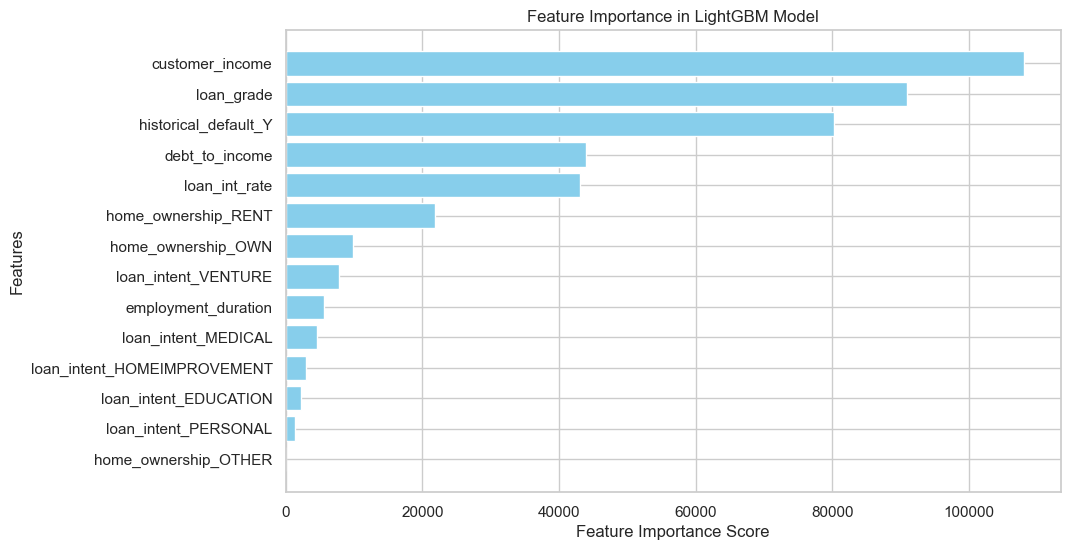

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance from the model
feature_importance = model.feature_importance(importance_type='gain')

# Assuming you have a list of feature names
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])]

# Create a DataFrame to hold feature names and their importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top features
print("Top Features by Importance:\n", importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in LightGBM Model")
plt.show()


### Confusion Matrix 

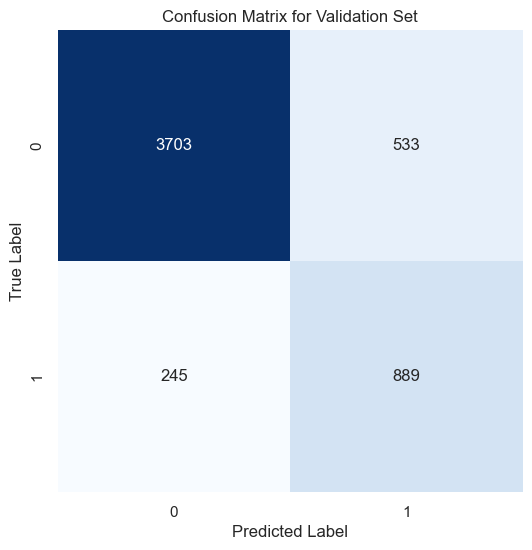

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix for the validation set
conf_matrix_val = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix for the validation set
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Validation Set')
plt.show()




### ROC Curve 

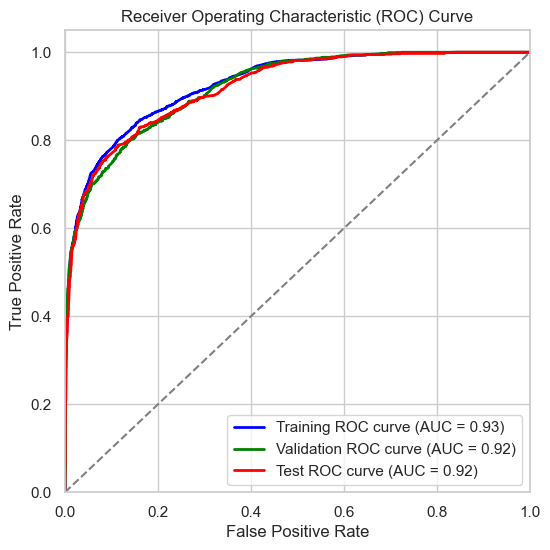

In [67]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probability predictions for each set
y_train_proba = model.predict(X_train)  
y_val_proba = model.predict(X_val)      
y_test_proba = model.predict(X_test)    

# Compute ROC curve and AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute ROC curve and AUC for the validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
roc_auc_val = auc(fpr_val, tpr_val)

# Compute ROC curve and AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot the ROC curves
plt.figure(figsize=(6, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_val, tpr_val, color='green', lw=2, label=f'Validation ROC curve (AUC = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### LGBM + SMOTE + Hyperparameter tuning manually

In [68]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert the data into LightGBM Dataset format
train_data = lgb.Dataset(X_train_resampled, label=y_train_resampled)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# Set parameters for LightGBM
params = {
    'objective': 'binary',  
    'boosting_type': 'dart', 
    'metric': 'binary_logloss',  
    'is_unbalance': True,  
    'learning_rate': 0.02,
    'num_leaves': 100,
    'max_depth': 5,
    'verbosity': -1,
}

# Train the model with early stopping
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],
    callbacks=[lgb.early_stopping(stopping_rounds=50)]
)

# Make predictions on the training set
y_train_pred = model.predict(X_train_resampled)
y_train_pred_binary = (y_train_pred >= 0.5).astype(int)  

# Make predictions on the validation set
y_val_pred = model.predict(X_val)
y_val_pred_binary = (y_val_pred >= 0.5).astype(int)  

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)  

# Generate classification report for training set
print("\nClassification Report for Training Set:")
print(classification_report(y_train_resampled, y_train_pred_binary))

# Evaluate the model on the validation set
print("\nClassification Report for Validation Set:")
print(classification_report(y_val, y_val_pred_binary))

# Evaluate the model on the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred_binary))

# Calculate precision, recall, and F1 score for training, validation, and test sets
def evaluate_performance(y_true, y_pred, set_name):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{set_name} Set Performance:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Evaluate performance on the training, validation, and test sets
evaluate_performance(y_train_resampled, y_train_pred_binary, "Training")
evaluate_performance(y_val, y_val_pred_binary, "Validation")
evaluate_performance(y_test, y_test_pred_binary, "Test")



Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86     12709
           1       0.85      0.88      0.86     12709

    accuracy                           0.86     25418
   macro avg       0.86      0.86      0.86     25418
weighted avg       0.86      0.86      0.86     25418


Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      4236
           1       0.56      0.76      0.64      1134

    accuracy                           0.82      5370
   macro avg       0.74      0.80      0.76      5370
weighted avg       0.85      0.82      0.83      5370


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      4237
           1       0.54      0.78      0.64      1133

    accuracy                           0.81      5370
   macr

### LGBM + Grid search without SMOTE

In [69]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Define parameter grid for GridSearch
param_grid = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 10, 20],
    'metric': ['binary_logloss'],
    'is_unbalance': [True, False]
}

# Create LGBMClassifier
lgbm_model = lgb.LGBMClassifier()

# Setup Grid Search
grid_search = GridSearchCV(estimator=lgbm_model,
                           param_grid=param_grid,
                           scoring='f1',  
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Output best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Train final model with best parameters
best_model = grid_search.best_estimator_

# Make predictions on the training, validation, and test sets
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

# Function to evaluate precision, recall, and F1 score
def evaluate_metrics(y_true, y_pred, set_name):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{set_name} Set Performance:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Calculate and print metrics for training, validation, and test sets
evaluate_metrics(y_train, y_train_pred, "Training")
evaluate_metrics(y_val, y_val_pred, "Validation")
evaluate_metrics(y_test, y_test_pred, "Test")

# Generate classification report for test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters:  {'boosting_type': 'gbdt', 'is_unbalance': False, 'learning_rate': 0.1, 'max_depth': -1, 'metric': 'binary_logloss', 'num_leaves': 50}
Best Score:  0.768832675318127

Training Set Performance:
Precision: 0.9518
Recall: 0.7777
F1 Score: 0.8560

Validation Set Performance:
Precision: 0.9022
Recall: 0.6993
F1 Score: 0.7879

Test Set Performance:
Precision: 0.8793
Recall: 0.7202
F1 Score: 0.7918

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4237
           1       0.88      0.72      0.79      1133

    accuracy                           0.92      5370
   macro avg       0.90      0.85      0.87      5370
weighted avg       0.92      0.92      0.92      5370



### LGBM + Grid search + SMOTE

In [70]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Apply MSMOTE to the training data
msmote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = msmote.fit_resample(X_train, y_train)

# Define parameter grid for GridSearch
param_grid = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 10, 20],
    'metric': ['binary_logloss'],
    'is_unbalance': [True, False]
}

# Create LGBMClassifier
lgbm_model = lgb.LGBMClassifier()

# Setup Grid Search
grid_search = GridSearchCV(estimator=lgbm_model,
                           param_grid=param_grid,
                           scoring='f1',  
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

# Fit Grid Search on the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Output best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Train final model with best parameters
best_model = grid_search.best_estimator_

# Make predictions on the training, validation, and test sets
y_train_pred = best_model.predict(X_train_resampled)
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

# Function to evaluate precision, recall, and F1 score
def evaluate_metrics(y_true, y_pred, set_name):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{set_name} Set Performance:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Calculate and print metrics for training, validation, and test sets
evaluate_metrics(y_train_resampled, y_train_pred, "Training")
evaluate_metrics(y_val, y_val_pred, "Validation")
evaluate_metrics(y_test, y_test_pred, "Test")

# Generate classification report for test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters:  {'boosting_type': 'gbdt', 'is_unbalance': True, 'learning_rate': 0.1, 'max_depth': 10, 'metric': 'binary_logloss', 'num_leaves': 70}
Best Score:  0.8862629615053154

Training Set Performance:
Precision: 0.9681
Recall: 0.9511
F1 Score: 0.9596

Validation Set Performance:
Precision: 0.7812
Recall: 0.7399
F1 Score: 0.7600

Test Set Performance:
Precision: 0.7690
Recall: 0.7520
F1 Score: 0.7604

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4237
           1       0.77      0.75      0.76      1133

    accuracy                           0.90      5370
   macro avg       0.85      0.85      0.85      5370
weighted avg       0.90      0.90      0.90      5370

